In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.dates as mdates


In [2]:
# Load the Excel file
excel_file = pd.ExcelFile('D:\Derivatives Trading\TAIEX derivatives trading record.xlsx')

# Get the sheet you want to read
sheet_name = 'ETF_PY' # Replace with the name of the sheet you want to read
df = excel_file.parse(sheet_name)

In [3]:
# Output data information
print(df.head())


        Date   PnL Index   Returns
0 2024-06-11  100.000000       NaN
1 2024-06-12  100.716041  0.007160
2 2024-06-13  101.715639  0.009925
3 2024-06-14  102.590774  0.008604


In [4]:
#******Plotting setup*****#
# Generate some data
Date = df["Date"]
Date
y1 =df["PnL Index"]
y1
#y2 = df["TAIEX"]
#y2

0    100.000000
1    100.716041
2    101.715639
3    102.590774
Name: PnL Index, dtype: float64

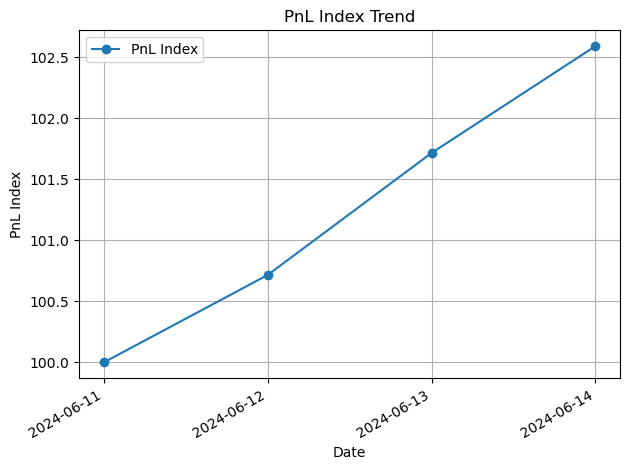

In [6]:
# Creating a figure and axis object
fig, ax = plt.subplots()

# Plotting data
ax.plot(Date, y1, label='PnL Index', marker='o', linestyle='-')

# Setting the title and labels
ax.set_title('PnL Index Trend')
ax.set_xlabel('Date')
ax.set_ylabel('PnL Index')

# Date formatting on the x-axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Rotate date labels for better visibility
plt.gcf().autofmt_xdate()

# Adding a grid, legend, and layout adjustment
ax.grid(True)
plt.legend()
plt.tight_layout()

In [7]:
#########################################################
#ETF Portfolio Allocation
# Get the sheet you want to read
sheet_name_2 = 'ETF_Allocation'  # Replace 'Correct_Sheet_Name' with the actual sheet name
df_2 = excel_file.parse(sheet_name_2)
ETF=df_2["ETF"]
Shares=df_2["Shares"]
Value=df_2["Value"]
Total=df_2["Total"]
Percentage=df_2["Percentage"]

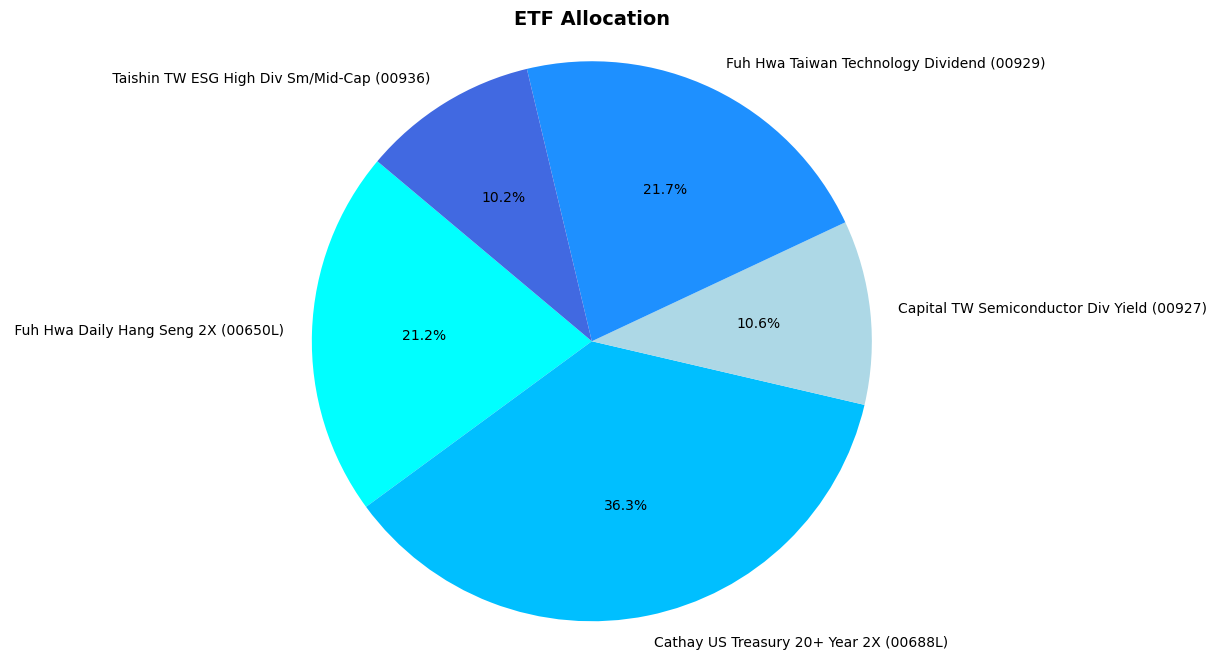

In [8]:
# Custom colors for the pie chart slices
colors = ['cyan','deepskyblue','lightblue','dodgerblue','royalblue']

# Plotting the pie chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(df_2['Percentage'], labels=df_2['ETF'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('ETF Allocation', fontweight='bold', fontsize=14)  # Title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()
